In [1]:
#Disable Warnings for deprecation and other issues
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
test = pd.read_pickle("public_private.pkl")
train = pd.read_pickle("updated_train.pkl")


In [14]:
test.head()

,cust_id,alert_key,risk_rank,occupation_code,total_asset,AGE,CustID_TX_30D_Window,CustID_AVG_AMT_30D_Window,CustID_AVG_CYCAM_30D_Window,CustID_AVG_amt_30D_Window,CustID_AVG_LUPAY_30D_Window,CustID_AVG_USGAM_30D_Window,CustID_AVG_CUCSM_30D_Window,CustID_AVG_TAU_30D_Window
5699,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,352282.0,1.0,12.0,-0.675985,5.0,2.0,0.295677,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
62052,04ac4e9d22843711c4c1276de3b55c377016e2158f280f...,352858.0,3.0,14.0,1.178182,4.0,965.0,-0.554118,1.219585,0.194326,1.603865,0.623647,0.965612,0.0
44028,05d16120e622640438421a39564db6eedc105f0e343435...,352670.0,1.0,17.0,1.547848,5.0,20.0,0.128599,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
64471,0cda333980decc8bad60985c8420e3e36577163306c3c7...,352872.0,1.0,4.0,1.617460,4.0,61.0,0.293187,-0.940162,0.342775,0.088404,-0.394431,-2.723426,0.0
35807,102e3ba50d2b335b71e881df9ef5fea70124a240e8b15c...,352495.0,3.0,14.0,0.936115,4.0,183.0,0.997599,-0.017549,-0.023050,1.309244,1.125236,1.182681,0.0


In [15]:
#Check for duplicates in alert_key in test data
test['alert_key'].duplicated().sum()

0

In [16]:
#Order the data by alert_key
test = test.sort_values(by='alert_key')


In [17]:
test

,cust_id,alert_key,risk_rank,occupation_code,total_asset,AGE,CustID_TX_30D_Window,CustID_AVG_AMT_30D_Window,CustID_AVG_CYCAM_30D_Window,CustID_AVG_amt_30D_Window,CustID_AVG_LUPAY_30D_Window,CustID_AVG_USGAM_30D_Window,CustID_AVG_CUCSM_30D_Window,CustID_AVG_TAU_30D_Window
3626,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,352249.0,1.0,19.0,1.191587,7.0,470.0,0.277638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4469,b212d14cb35676926682b2cf849e295d948888f556c07e...,352253.0,1.0,2.0,-0.086847,2.0,111.0,0.856091,-0.031341,1.363436,0.174669,-0.557185,-0.464596,0.170220
4616,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,352254.0,1.0,19.0,1.441714,7.0,15.0,0.522015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5600,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,352280.0,3.0,15.0,0.180977,5.0,146.0,-0.222574,0.168504,-0.824547,0.247736,1.375296,0.005933,0.000000
5699,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,352282.0,1.0,12.0,-0.675985,5.0,2.0,0.295677,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16646,8219a35b62898b6da983fb2a15c8b714614c6bbb69efd6...,378414.0,3.0,10.0,-1.280307,1.0,80.0,0.345112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
52647,4270ec5f17593a85ed237cb562788bcac84bae26bb2654...,378419.0,1.0,6.0,-0.315333,2.0,8.0,1.859015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
53825,4e61df8213c8d5614703c97f909dedaeb3214a3e8eb8f7...,378426.0,1.0,12.0,1.792767,2.0,73.0,0.903831,0.000000,-0.483783,0.000000,0.000000,0.000000,0.000000
51871,937525790c682522a07fe0ad1067826c1ef0c21cf76ed8...,378427.0,1.0,16.0,-0.414049,1.0,120.0,0.610804,0.000000,0.000000,0.000000,0.000000,0.000000,0.893223


In [18]:
train.head()

,cust_id,alert_key,sar_flag,risk_rank,occupation_code,total_asset,AGE,CustID_TX_30D_Window,CustID_AVG_AMT_30D_Window,CustID_AVG_CYCAM_30D_Window,CustID_AVG_amt_30D_Window,CustID_AVG_LUPAY_30D_Window,CustID_AVG_USGAM_30D_Window,CustID_AVG_CUCSM_30D_Window,CustID_AVG_TAU_30D_Window
0,25cf26d9c40bb9f71292b809c4f92018b9bdfe3529c510...,171770.0,1.0,1.0,17.0,1.385366,4.0,4.0,1.691574,1.107850,0.000000,0.281366,0.221779,2.283386,0.000000
1,7fde997da7e7a95280460889004bd2f23050bd8953de7e...,172480.0,1.0,3.0,12.0,-0.659020,4.0,23.0,0.402829,-1.124205,-0.666103,0.713153,-0.267507,1.700865,0.000000
2,bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...,174298.0,1.0,1.0,19.0,0.148138,7.0,31.0,0.792194,-0.339314,0.771465,1.155151,0.818621,6.573287,0.082032
3,26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...,177960.0,1.0,1.0,9.0,0.249353,2.0,172.0,0.599608,-0.554051,-0.359598,0.727619,0.977680,1.254606,0.000000
4,6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...,177788.0,1.0,1.0,15.0,1.309937,5.0,44.0,0.789862,0.971030,-1.347197,0.354397,-0.189704,0.038407,0.000000


In [7]:
len(train)

25751

In [19]:
#Assign sar_flag to Y 
Y = train['sar_flag']
#Drop sar_flag from train
train.drop('sar_flag', axis=1, inplace=True)

#Drop sar_flag from test
#test.drop('sar_flag', axis=1, inplace=True)

#Check the shape of train and test
print(train.shape)
print(test.shape)

#Add Alert Key to new dataframe
testAlert = pd.DataFrame(test['alert_key'])

#Drop alert_key and cust_id from test
test.drop(['alert_key','cust_id'], axis=1, inplace=True)

#Check the shape of test
print(test.shape)

#check shape of testAlert
print(testAlert.shape)

(25751, 14)
(3850, 14)
(3850, 12)
(3850, 1)


In [20]:
#Assign the columns to X
X = train
#Drop alert_key and cust_id from X
X.drop(['alert_key','cust_id'], axis=1, inplace=True)

#Check the shape of X
print(X.shape)

(25751, 12)


In [106]:
#Convert train and test to pkl
train.to_pickle("trainFinal.pkl")
Y.to_pickle("YFinal.pkl")
test.to_pickle("testFinal.pkl")


In [21]:
Y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: sar_flag, dtype: float64

In [22]:
Y.value_counts()

0.0    25506
1.0      245
Name: sar_flag, dtype: int64

In [23]:
#Import SMOTE
from imblearn.over_sampling import SMOTE


In [44]:
#Use SMOTE to balance the data with 1 to 0.5 ratio
sm = SMOTE(random_state=42, sampling_strategy=1)
X_res, Y_res = sm.fit_sample(X, Y)

#Check the shape of X_res and Y_res
print(X_res.shape)
print(Y_res.shape)



(51012, 12)
(51012,)


In [45]:
#Y_res head
Y_res.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: sar_flag, dtype: float64

In [46]:
#Check the value counts of the oversampled data
Y_res.value_counts()

1.0    25506
0.0    25506
Name: sar_flag, dtype: int64

In [47]:
#Import Train Test Split
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size = 0.2, random_state = 42)


In [48]:
#Import Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
#Import Roc Curve  
from sklearn.metrics import roc_curve, auc
#import XGBClassifier, RandomForestClassifier, KnearsNeighborsClassifier, logisticRegression
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression



In [49]:

#Function for plotting ROC_AUC curve
def plot_roc_curve(Y_test, preds):
    fpr, tpr, thresholds = roc_curve(Y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      0.91      0.95      5072
         1.0       0.92      0.99      0.95      5131

    accuracy                           0.95     10203
   macro avg       0.95      0.95      0.95     10203
weighted avg       0.95      0.95      0.95     10203

Confusion matrix:
 [[4611  461]
 [  67 5064]]


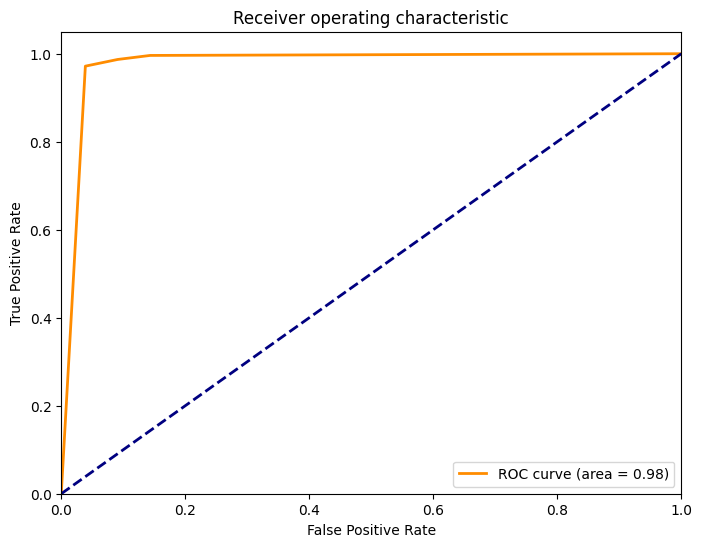

In [50]:
# Create K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, knn_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, knn_pred))
plot_roc_curve(Y_test, knn.predict_proba(X_test)[::,1])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      5072
         1.0       1.00      0.99      1.00      5131

    accuracy                           1.00     10203
   macro avg       1.00      1.00      1.00     10203
weighted avg       1.00      1.00      1.00     10203

Confusion matrix:
 [[5058   14]
 [  30 5101]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


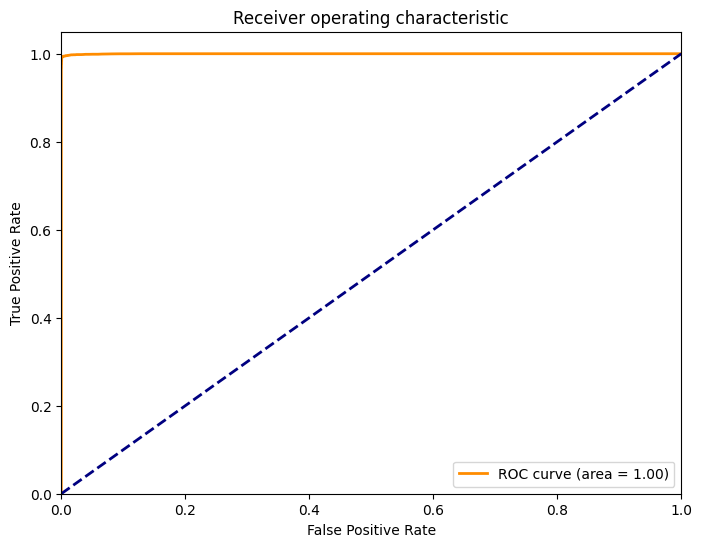

In [51]:
#Create Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced',verbose=1)
rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, rfc_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, rfc_pred))
plot_roc_curve(Y_test, rfc.predict_proba(X_test)[::,1])

Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      5072
         1.0       1.00      0.99      0.99      5131

    accuracy                           0.99     10203
   macro avg       0.99      0.99      0.99     10203
weighted avg       0.99      0.99      0.99     10203

Confusion matrix:
 [[5060   12]
 [  42 5089]]


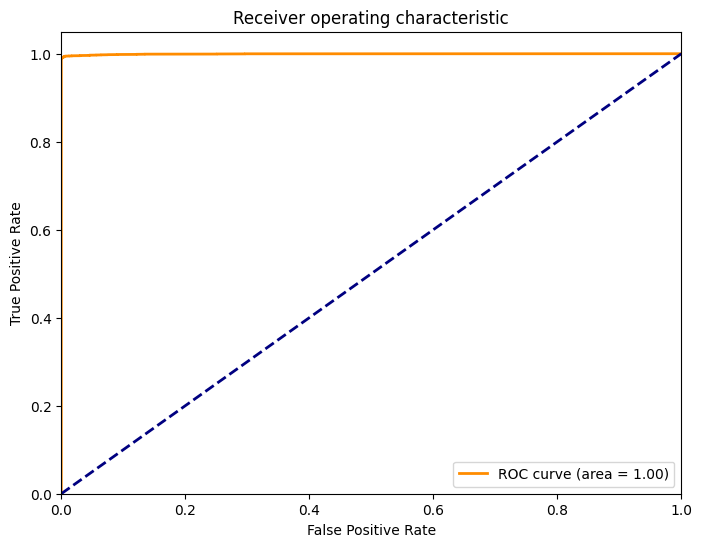

In [52]:
#Create XGBoost Classifier
xgboost = xgb.XGBClassifier(n_estimators=100, random_state=42, verbosity=1, objective='binary:logistic',eval_metric='rmse')

xgboost.fit(X_train, Y_train)
xgb_pred = xgboost.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, xgb_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, xgb_pred))
plot_roc_curve(Y_test, xgboost.predict_proba(X_test)[::,1])


In [53]:
#Check the accuracy of the model
print("Accuracy of the model is: ", accuracy_score(Y_test, xgb_pred))

Accuracy of the model is:  0.9947074389885328


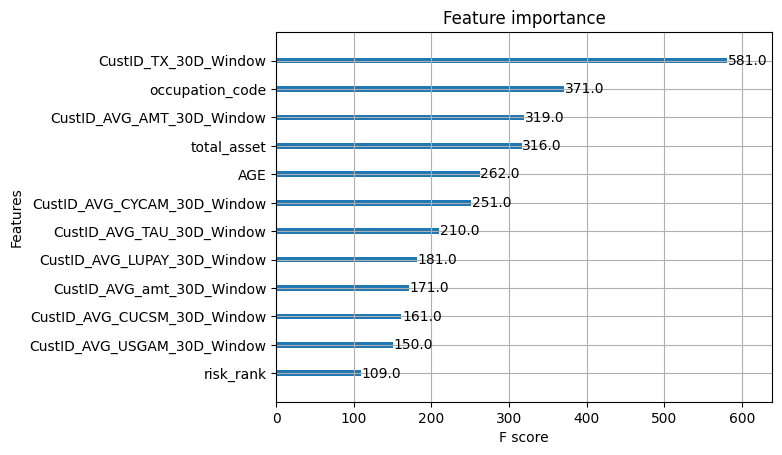

In [54]:
#Plot feature importance
xgb.plot_importance(xgboost)
plt.show()

In [55]:
#List columns in X_train data
X_train.columns


Index(['risk_rank', 'occupation_code', 'total_asset', 'AGE',
       'CustID_TX_30D_Window', 'CustID_AVG_AMT_30D_Window',
       'CustID_AVG_CYCAM_30D_Window', 'CustID_AVG_amt_30D_Window',
       'CustID_AVG_LUPAY_30D_Window', 'CustID_AVG_USGAM_30D_Window',
       'CustID_AVG_CUCSM_30D_Window', 'CustID_AVG_TAU_30D_Window'],
      dtype='object')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.68      0.60      0.64      5072
         1.0       0.65      0.72      0.68      5131

    accuracy                           0.66     10203
   macro avg       0.66      0.66      0.66     10203
weighted avg       0.66      0.66      0.66     10203

Confusion matrix:
 [[3062 2010]
 [1438 3693]]


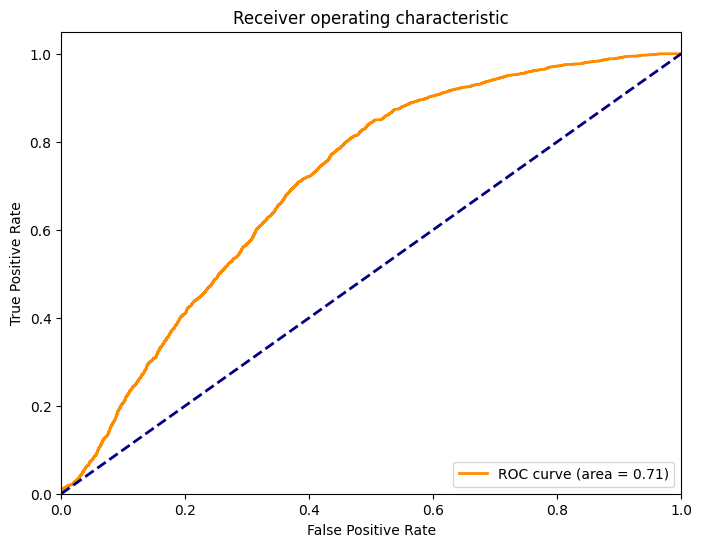

In [56]:
#Create Logistic Regression Classifier for fraud detection
lr = LogisticRegression(random_state=42, class_weight='balanced', verbose=1)
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, lr_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, lr_pred))
plot_roc_curve(Y_test, lr.predict_proba(X_test)[::,1])

In [57]:
test.head()

,risk_rank,occupation_code,total_asset,AGE,CustID_TX_30D_Window,CustID_AVG_AMT_30D_Window,CustID_AVG_CYCAM_30D_Window,CustID_AVG_amt_30D_Window,CustID_AVG_LUPAY_30D_Window,CustID_AVG_USGAM_30D_Window,CustID_AVG_CUCSM_30D_Window,CustID_AVG_TAU_30D_Window
3626,1.0,19.0,1.191587,7.0,470.0,0.277638,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4469,1.0,2.0,-0.086847,2.0,111.0,0.856091,-0.031341,1.363436,0.174669,-0.557185,-0.464596,0.17022
4616,1.0,19.0,1.441714,7.0,15.0,0.522015,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
5600,3.0,15.0,0.180977,5.0,146.0,-0.222574,0.168504,-0.824547,0.247736,1.375296,0.005933,0.00000
5699,1.0,12.0,-0.675985,5.0,2.0,0.295677,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [58]:
len(test)


3850

In [59]:
#Use classifier to test the test data
xgb_pred_test = xgboost.predict(test)
knn_pred_test = knn.predict(test)
rfc_pred_test = rfc.predict(test)
lr_pred_test = lr.predict(test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [60]:
#Create a dataframe with the results
results = pd.DataFrame({'XGB':xgb_pred_test, 'KNN':knn_pred_test, 'RFC':rfc_pred_test, 'LR':lr_pred_test})
results.head()



,XGB,KNN,RFC,LR
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0


In [61]:
results['XGB'].value_counts()

0.0    3730
1.0     120
Name: XGB, dtype: int64

In [62]:
results['KNN'].value_counts()

0.0    3326
1.0     524
Name: KNN, dtype: int64

In [63]:
results['RFC'].value_counts()

0.0    3764
1.0      86
Name: RFC, dtype: int64

In [64]:
results['LR'].value_counts()

1.0    2107
0.0    1743
Name: LR, dtype: int64

In [65]:
#Predict probablity of fraud using models
xgb_pred_test_prob = xgboost.predict_proba(test)
knn_pred_test_prob = knn.predict_proba(test)
rfc_pred_test_prob = rfc.predict_proba(test)
lr_pred_test_prob = lr.predict_proba(test)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [66]:
#print the probablity of fraud
print(xgb_pred_test_prob)
print(knn_pred_test_prob)
print(rfc_pred_test_prob)
print(lr_pred_test_prob)

[[0.993666   0.00633403]
 [0.9987501  0.00124989]
 [0.99513495 0.00486504]
 ...
 [0.99261093 0.00738909]
 [0.62612724 0.37387273]
 [0.7575202  0.2424798 ]]
[[1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 ...
 [0.66666667 0.33333333]
 [0.33333333 0.66666667]
 [0.66666667 0.33333333]]
[[1.   0.  ]
 [0.98 0.02]
 [0.95 0.05]
 ...
 [0.96 0.04]
 [0.68 0.32]
 [0.71 0.29]]
[[0.3441023  0.6558977 ]
 [0.47204396 0.52795604]
 [0.33253973 0.66746027]
 ...
 [0.24426936 0.75573064]
 [0.25324507 0.74675493]
 [0.41457704 0.58542296]]


In [67]:
#Create dataframe with probablity of fraud from xgb
xgb_pred_test_prob = pd.DataFrame(xgb_pred_test_prob)
xgb_pred_test_prob.head()

,0,1
0,0.993666,0.006334
1,0.998750,0.001250
2,0.995135,0.004865
3,0.999946,0.000054
4,0.999787,0.000213


In [68]:
#Create dataframe with probablity of fraud from knn
knn_pred_test_prob = pd.DataFrame(knn_pred_test_prob)
knn_pred_test_prob.head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [69]:
#Create dataframe with probablity of fraud from rfc
rfc_pred_test_prob = pd.DataFrame(rfc_pred_test_prob)
rfc_pred_test_prob.head()

,0,1
0,1.00,0.00
1,0.98,0.02
2,0.95,0.05
3,1.00,0.00
4,0.99,0.01


In [70]:
#Create dataframe with probablity of fraud from lr
lr_pred_test_prob = pd.DataFrame(lr_pred_test_prob)
lr_pred_test_prob.head()

,0,1
0,0.344102,0.655898
1,0.472044,0.527956
2,0.332540,0.667460
3,0.668718,0.331282
4,0.450344,0.549656


In [43]:
bTrain = pd.read_pickle("train_data.pkl")
bTest = pd.read_pickle("test_data.pkl")

In [71]:
len(testAlert)

3850

In [72]:
len(xgb_pred_test_prob)

3850

In [73]:
#Conver xgb_pred_test_prob to csv
xgb_pred_test_prob.to_csv('xgb_pred_test_prob.csv', index=False)

In [74]:
#Reset index of testAlert
testAlert.reset_index(drop=True, inplace=True)


In [75]:
#Add probablity of fraud to the testalert dataframe
testAlert['probability'] = xgb_pred_test_prob[1]
testAlert.head()






,alert_key,probability
0,352249.0,0.006334
1,352253.0,0.001250
2,352254.0,0.004865
3,352280.0,0.000054
4,352282.0,0.000213


In [76]:
len(testAlert)


3850

In [77]:
my_submission = testAlert

In [78]:
#find 357307 in the testAlert dataframe
testAlert.loc[testAlert['alert_key'] == 357307]


,alert_key,probability
720,357307.0,0.006294


In [79]:
#Import sample.cs to dataframe
sample = pd.read_csv("sample.csv")
sample.head()

,alert_key,probability
0,357307,0.000017
1,376329,0.000324
2,373644,0.000372
3,357668,0.000489
4,354443,0.000526


In [80]:
len(sample)

3850

In [81]:
#Order the sample dataframe by alert_key
sample = sample.sort_values(by=['alert_key'])
sample.head()

,alert_key,probability
372,352249,0.098923
1318,352253,0.344260
674,352254,0.177932
3000,352280,0.784828
3640,352282,0.949316


In [82]:
#Combine my_submission and sample and replace the probability column with my_submission probability column
my_submission_combine = pd.merge(sample, testAlert, on='alert_key', how='left')
my_submission_combine.head()


,alert_key,probability_x,probability_y
0,352249,0.098923,0.006334
1,352253,0.344260,0.001250
2,352254,0.177932,0.004865
3,352280,0.784828,0.000054
4,352282,0.949316,0.000213


In [83]:
len(my_submission_combine)

3850

In [84]:
#find row with 352249.0
my_submission_combine.loc[my_submission_combine['alert_key'] == 352249.0]


,alert_key,probability_x,probability_y
0,352249,0.098923,0.006334


In [85]:
#Replace the null values with the sample probability but keep the non null values
my_submission_combine['probability'] = my_submission_combine['probability_y'].fillna(my_submission_combine['probability_x'])
my_submission_combine.head()





,alert_key,probability_x,probability_y,probability
0,352249,0.098923,0.006334,0.006334
1,352253,0.344260,0.001250,0.001250
2,352254,0.177932,0.004865,0.004865
3,352280,0.784828,0.000054,0.000054
4,352282,0.949316,0.000213,0.000213


In [86]:
len(my_submission_combine)

3850

In [87]:
#Drop the probability_x and probability_y columns
my_submission_combine.drop(['probability_x', 'probability_y'], axis=1, inplace=True)
my_submission_combine.head()

,alert_key,probability
0,352249,0.006334
1,352253,0.001250
2,352254,0.004865
3,352280,0.000054
4,352282,0.000213


In [88]:
#My submission combine dataframe head
my_submission_combine.head()

,alert_key,probability
0,352249,0.006334
1,352253,0.001250
2,352254,0.004865
3,352280,0.000054
4,352282,0.000213


In [90]:
#convert the dataframe to csv
my_submission_combine.to_csv('submission30DDataSet.csv', index=False)


In [91]:
#Implement kfolds cross validation to check the accuracy of the model
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgboost, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))



Accuracy: 99.54 %
Standard Deviation: 0.07 %


In [92]:
#Import Optuna
import optuna


In [94]:
#Create a function to optimize the hyperparameters of xgb
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.4, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
    }
    xgbest = xgb.XGBClassifier(**param)
    xgbest.fit(X_train, Y_train)
    y_pred = xgbest.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    return accuracy



    

In [95]:
#Create a study object and optimize the hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

#Print the best parameters
print(study.best_params)

#Print the best value
print(study.best_value)


[I 2022-12-26 13:53:49,797] A new study created in memory with name: no-name-e9a3ff7d-a48e-4e48-af87-434b8ec299be


[13:53:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 13:53:51,814] Trial 0 finished with value: 0.973145153386259 and parameters: {'n_estimators': 150, 'max_depth': 3, 'learning_rate': 0.10232554963602865, 'subsample': 0.7693437135250267, 'colsample_bytree': 0.44200153982365237, 'gamma': 0.006390494567203079, 'reg_alpha': 0.00013597381874903966, 'reg_lambda': 5.22617403445612e-08}. Best is trial 0 with value: 0.973145153386259.


[13:53:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 13:53:59,247] Trial 1 finished with value: 0.9574634911300598 and parameters: {'n_estimators': 499, 'max_depth': 4, 'learning_rate': 0.012549901270101855, 'subsample': 0.6009108841592338, 'colsample_bytree': 0.5824289846529622, 'gamma': 6.740919137772289e-08, 'reg_alpha': 0.06923904496862554, 'reg_lambda': 1.0948112883330057e-06}. Best is trial 0 with value: 0.973145153386259.


[13:53:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 13:54:06,588] Trial 2 finished with value: 0.9942173870430265 and parameters: {'n_estimators': 275, 'max_depth': 8, 'learning_rate': 0.04248799817000363, 'subsample': 0.667832451665468, 'colsample_bytree': 0.5380566120657566, 'gamma': 5.0327879235605954e-05, 'reg_alpha': 0.02784364860290146, 'reg_lambda': 7.064461368974235e-08}. Best is trial 2 with value: 0.9942173870430265.


[13:54:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 13:54:16,816] Trial 3 finished with value: 0.95432715867882 and parameters: {'n_estimators': 533, 'max_depth': 4, 'learning_rate': 0.01024247036199282, 'subsample': 0.9827656910840732, 'colsample_bytree': 0.8026995581899384, 'gamma': 1.4153177150806498e-06, 'reg_alpha': 9.814093020407235e-06, 'reg_lambda': 1.3210566078670098e-07}. Best is trial 2 with value: 0.9942173870430265.


[13:54:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 13:54:22,253] Trial 4 finished with value: 0.9950994805449378 and parameters: {'n_estimators': 243, 'max_depth': 6, 'learning_rate': 0.2696265772890858, 'subsample': 0.6246807224834858, 'colsample_bytree': 0.8821914760299976, 'gamma': 3.30857120254764e-08, 'reg_alpha': 0.0035376705015046136, 'reg_lambda': 0.5980358393297647}. Best is trial 4 with value: 0.9950994805449378.


[13:54:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 13:54:40,019] Trial 5 finished with value: 0.9949034597667352 and parameters: {'n_estimators': 961, 'max_depth': 5, 'learning_rate': 0.21594559582304834, 'subsample': 0.6305813709033965, 'colsample_bytree': 0.8048012672465963, 'gamma': 0.11329757871136362, 'reg_alpha': 0.005513451590987152, 'reg_lambda': 2.653127267325552e-05}. Best is trial 4 with value: 0.9950994805449378.


[13:54:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 13:54:43,700] Trial 6 finished with value: 0.9935313143193178 and parameters: {'n_estimators': 114, 'max_depth': 9, 'learning_rate': 0.05417289603473273, 'subsample': 0.5687330242339497, 'colsample_bytree': 0.47730358462395206, 'gamma': 2.7537017747227252e-06, 'reg_alpha': 4.3590334245609287e-05, 'reg_lambda': 0.00033292016360333173}. Best is trial 4 with value: 0.9950994805449378.


[13:54:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 13:54:49,671] Trial 7 finished with value: 0.9928452415956092 and parameters: {'n_estimators': 206, 'max_depth': 8, 'learning_rate': 0.038804047137192606, 'subsample': 0.5981290226987109, 'colsample_bytree': 0.4253753846322477, 'gamma': 0.0180947841168621, 'reg_alpha': 0.00024941575373658645, 'reg_lambda': 9.521418851238259e-08}. Best is trial 4 with value: 0.9950994805449378.


[13:54:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 13:54:54,742] Trial 8 finished with value: 0.9939233558757228 and parameters: {'n_estimators': 353, 'max_depth': 4, 'learning_rate': 0.4189020493165695, 'subsample': 0.40565444389330285, 'colsample_bytree': 0.8718587898196954, 'gamma': 1.6486415065068986e-05, 'reg_alpha': 2.973586822632714e-06, 'reg_lambda': 0.00037486036024629766}. Best is trial 4 with value: 0.9950994805449378.


[13:54:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 13:55:08,307] Trial 9 finished with value: 0.9947074389885328 and parameters: {'n_estimators': 732, 'max_depth': 6, 'learning_rate': 0.04745186221069352, 'subsample': 0.4195295993777768, 'colsample_bytree': 0.4628655310392527, 'gamma': 0.0030201522550399704, 'reg_alpha': 3.657119548940208e-05, 'reg_lambda': 0.01647645143936426}. Best is trial 4 with value: 0.9950994805449378.


[13:55:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 13:55:17,485] Trial 10 finished with value: 0.994805449377634 and parameters: {'n_estimators': 396, 'max_depth': 10, 'learning_rate': 0.22286345468740845, 'subsample': 0.48012007271718204, 'colsample_bytree': 0.9816975111304272, 'gamma': 1.02701581109299e-08, 'reg_alpha': 1.3278997648682254e-08, 'reg_lambda': 0.6468335369890993}. Best is trial 4 with value: 0.9950994805449378.


[13:55:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 13:55:38,939] Trial 11 finished with value: 0.995589532490444 and parameters: {'n_estimators': 952, 'max_depth': 6, 'learning_rate': 0.18895462290670867, 'subsample': 0.7530230890073365, 'colsample_bytree': 0.7234321031768626, 'gamma': 0.5043334694141999, 'reg_alpha': 0.0045687275976939975, 'reg_lambda': 7.721193972471451e-06}. Best is trial 11 with value: 0.995589532490444.


[13:55:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 13:56:00,051] Trial 12 finished with value: 0.9940213662648241 and parameters: {'n_estimators': 795, 'max_depth': 7, 'learning_rate': 0.4844334791831343, 'subsample': 0.7957001177387415, 'colsample_bytree': 0.6907359136888634, 'gamma': 0.6974271784225408, 'reg_alpha': 0.6902380289183446, 'reg_lambda': 1.3191399876904333e-05}. Best is trial 11 with value: 0.995589532490444.


[13:56:00] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 13:56:16,347] Trial 13 finished with value: 0.9943153974321278 and parameters: {'n_estimators': 696, 'max_depth': 6, 'learning_rate': 0.1370742118538372, 'subsample': 0.7792263886289474, 'colsample_bytree': 0.6912385695108608, 'gamma': 0.0005541675418958199, 'reg_alpha': 0.0018227812396981288, 'reg_lambda': 0.653196036333192}. Best is trial 11 with value: 0.995589532490444.


[13:56:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 13:56:38,395] Trial 14 finished with value: 0.9946094285994316 and parameters: {'n_estimators': 986, 'max_depth': 7, 'learning_rate': 0.24079442023065165, 'subsample': 0.8805721487016305, 'colsample_bytree': 0.9916793786229731, 'gamma': 3.3099248835881666e-07, 'reg_alpha': 0.002364049610035833, 'reg_lambda': 0.011243946761135888}. Best is trial 11 with value: 0.995589532490444.


[13:56:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 13:56:50,170] Trial 15 finished with value: 0.994413407821229 and parameters: {'n_estimators': 635, 'max_depth': 5, 'learning_rate': 0.11142018931664285, 'subsample': 0.5248343501433149, 'colsample_bytree': 0.7003465148494042, 'gamma': 0.00040145531512368355, 'reg_alpha': 3.4498517829426184e-07, 'reg_lambda': 0.010800676368813239}. Best is trial 11 with value: 0.995589532490444.


[13:56:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 13:57:09,637] Trial 16 finished with value: 0.9950014701558365 and parameters: {'n_estimators': 833, 'max_depth': 6, 'learning_rate': 0.3058937080319096, 'subsample': 0.6998699576882671, 'colsample_bytree': 0.849316146004399, 'gamma': 0.859745283391608, 'reg_alpha': 0.6981517284410442, 'reg_lambda': 3.0964705443221463e-06}. Best is trial 11 with value: 0.995589532490444.


[13:57:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 13:57:21,441] Trial 17 finished with value: 0.9953935117122416 and parameters: {'n_estimators': 437, 'max_depth': 8, 'learning_rate': 0.15533293841229912, 'subsample': 0.6960808494612962, 'colsample_bytree': 0.7519172598394736, 'gamma': 1.1250683852077537e-05, 'reg_alpha': 0.06498651121417415, 'reg_lambda': 0.0009214142530557544}. Best is trial 11 with value: 0.995589532490444.


[13:57:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 13:57:34,604] Trial 18 finished with value: 0.9941193766539254 and parameters: {'n_estimators': 429, 'max_depth': 8, 'learning_rate': 0.02392595371021961, 'subsample': 0.7244283597278105, 'colsample_bytree': 0.6266257529262945, 'gamma': 1.2678112933460152e-05, 'reg_alpha': 0.052463571077071836, 'reg_lambda': 0.0014480963272442107}. Best is trial 11 with value: 0.995589532490444.


[13:57:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 13:57:54,989] Trial 19 finished with value: 0.9956875428795452 and parameters: {'n_estimators': 609, 'max_depth': 10, 'learning_rate': 0.08062706671081, 'subsample': 0.8769152820746383, 'colsample_bytree': 0.7576992852980468, 'gamma': 0.00035929230251547853, 'reg_alpha': 0.1896792196416204, 'reg_lambda': 1.26119308267874e-06}. Best is trial 19 with value: 0.9956875428795452.


[13:57:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 13:58:23,765] Trial 20 finished with value: 0.9950994805449378 and parameters: {'n_estimators': 878, 'max_depth': 10, 'learning_rate': 0.06532497979593288, 'subsample': 0.9001851055176643, 'colsample_bytree': 0.5439041271745978, 'gamma': 0.03852151757665641, 'reg_alpha': 0.0005471895848325423, 'reg_lambda': 7.988638916341285e-07}. Best is trial 19 with value: 0.9956875428795452.


[13:58:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 13:58:41,078] Trial 21 finished with value: 0.9950014701558365 and parameters: {'n_estimators': 601, 'max_depth': 9, 'learning_rate': 0.14853270169448368, 'subsample': 0.8499764245865016, 'colsample_bytree': 0.7400657839233135, 'gamma': 0.00040098825910784956, 'reg_alpha': 0.14620676527659965, 'reg_lambda': 3.234127835440535e-05}. Best is trial 19 with value: 0.9956875428795452.


[13:58:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 13:58:56,846] Trial 22 finished with value: 0.9954915221013427 and parameters: {'n_estimators': 518, 'max_depth': 9, 'learning_rate': 0.08512951970397903, 'subsample': 0.7186027700648995, 'colsample_bytree': 0.6238929990996386, 'gamma': 9.020474335122985e-05, 'reg_alpha': 0.01581363506638737, 'reg_lambda': 5.405025911189826e-06}. Best is trial 19 with value: 0.9956875428795452.


[13:58:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 13:59:17,820] Trial 23 finished with value: 0.9950014701558365 and parameters: {'n_estimators': 619, 'max_depth': 9, 'learning_rate': 0.07895605235598185, 'subsample': 0.9777801725938081, 'colsample_bytree': 0.6363693132721708, 'gamma': 0.0031654583596283045, 'reg_alpha': 0.012573433955496705, 'reg_lambda': 1.3478224689271508e-08}. Best is trial 19 with value: 0.9956875428795452.


[13:59:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 13:59:40,203] Trial 24 finished with value: 0.9950994805449378 and parameters: {'n_estimators': 706, 'max_depth': 10, 'learning_rate': 0.0880492833046564, 'subsample': 0.8166063785366837, 'colsample_bytree': 0.6336792794967352, 'gamma': 9.863069728366335e-05, 'reg_alpha': 0.000751034284999898, 'reg_lambda': 4.203149280397566e-06}. Best is trial 19 with value: 0.9956875428795452.


[13:59:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:00:11,907] Trial 25 finished with value: 0.9950994805449378 and parameters: {'n_estimators': 923, 'max_depth': 9, 'learning_rate': 0.027126027620695076, 'subsample': 0.9225110453993064, 'colsample_bytree': 0.5747634238784239, 'gamma': 0.09843042311417215, 'reg_alpha': 0.016284602604480235, 'reg_lambda': 4.5078867053469026e-07}. Best is trial 19 with value: 0.9956875428795452.


[14:00:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:00:25,942] Trial 26 finished with value: 0.9950994805449378 and parameters: {'n_estimators': 489, 'max_depth': 10, 'learning_rate': 0.17185599877824595, 'subsample': 0.7539769067325348, 'colsample_bytree': 0.749974857124607, 'gamma': 0.0009185432552822812, 'reg_alpha': 0.31561030638622956, 'reg_lambda': 6.506416761350981e-06}. Best is trial 19 with value: 0.9956875428795452.


[14:00:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:00:34,941] Trial 27 finished with value: 0.9945114182103303 and parameters: {'n_estimators': 321, 'max_depth': 7, 'learning_rate': 0.06698942598654778, 'subsample': 0.8349481940061124, 'colsample_bytree': 0.5124132733181558, 'gamma': 5.3525256711550156e-05, 'reg_alpha': 0.009073080229215304, 'reg_lambda': 1.8408530617147913e-06}. Best is trial 19 with value: 0.9956875428795452.


[14:00:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:00:46,799] Trial 28 finished with value: 0.9942173870430265 and parameters: {'n_estimators': 592, 'max_depth': 5, 'learning_rate': 0.11150535734642016, 'subsample': 0.667739404973262, 'colsample_bytree': 0.6077224329193668, 'gamma': 0.24254225980238805, 'reg_alpha': 0.18509071781342645, 'reg_lambda': 8.186346475292736e-05}. Best is trial 19 with value: 0.9956875428795452.


[14:00:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:00:57,448] Trial 29 finished with value: 0.9804959325688523 and parameters: {'n_estimators': 766, 'max_depth': 3, 'learning_rate': 0.03230141995282733, 'subsample': 0.7540921693026363, 'colsample_bytree': 0.4008882506655912, 'gamma': 0.015106981147037842, 'reg_alpha': 0.0001350088958183728, 'reg_lambda': 2.6976939679139685e-07}. Best is trial 19 with value: 0.9956875428795452.


[14:00:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:01:27,591] Trial 30 finished with value: 0.9950994805449378 and parameters: {'n_estimators': 837, 'max_depth': 9, 'learning_rate': 0.018025394396809072, 'subsample': 0.928441551691842, 'colsample_bytree': 0.6599581713437112, 'gamma': 1.285907336292961e-06, 'reg_alpha': 0.9693010648878857, 'reg_lambda': 2.024210114524647e-08}. Best is trial 19 with value: 0.9956875428795452.


[14:01:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:01:40,419] Trial 31 finished with value: 0.995197490934039 and parameters: {'n_estimators': 452, 'max_depth': 8, 'learning_rate': 0.1010569489213864, 'subsample': 0.6956633398997262, 'colsample_bytree': 0.7622046090921901, 'gamma': 6.914071756486985e-06, 'reg_alpha': 0.06275053561438994, 'reg_lambda': 0.00017727854531274955}. Best is trial 19 with value: 0.9956875428795452.


[14:01:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:01:54,788] Trial 32 finished with value: 0.9950994805449378 and parameters: {'n_estimators': 548, 'max_depth': 8, 'learning_rate': 0.1811742274834213, 'subsample': 0.7273198414986648, 'colsample_bytree': 0.7795055135333958, 'gamma': 4.031965010841249e-07, 'reg_alpha': 0.03525233584401798, 'reg_lambda': 0.0020813036895768167}. Best is trial 19 with value: 0.9956875428795452.


[14:01:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:02:08,783] Trial 33 finished with value: 0.9950014701558365 and parameters: {'n_estimators': 481, 'max_depth': 10, 'learning_rate': 0.1293598700869539, 'subsample': 0.6587545259091373, 'colsample_bytree': 0.7120487740927808, 'gamma': 0.00018229235074599623, 'reg_alpha': 0.06952446952679149, 'reg_lambda': 6.43600427833378e-05}. Best is trial 19 with value: 0.9956875428795452.


[14:02:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:02:18,150] Trial 34 finished with value: 0.9956875428795452 and parameters: {'n_estimators': 363, 'max_depth': 9, 'learning_rate': 0.3393041309197337, 'subsample': 0.7892268406522183, 'colsample_bytree': 0.923345015322768, 'gamma': 2.4269338474465233e-05, 'reg_alpha': 0.15079482608715317, 'reg_lambda': 1.4115472318131544e-05}. Best is trial 19 with value: 0.9956875428795452.


[14:02:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:02:27,553] Trial 35 finished with value: 0.9952955013231403 and parameters: {'n_estimators': 357, 'max_depth': 9, 'learning_rate': 0.3731680812988558, 'subsample': 0.8567106840217336, 'colsample_bytree': 0.9455400668894636, 'gamma': 4.282707601386881e-05, 'reg_alpha': 0.2329480190638074, 'reg_lambda': 9.10099535882684e-06}. Best is trial 19 with value: 0.9956875428795452.


[14:02:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:02:34,851] Trial 36 finished with value: 0.9947074389885328 and parameters: {'n_estimators': 278, 'max_depth': 7, 'learning_rate': 0.3174681077528251, 'subsample': 0.7995283578569169, 'colsample_bytree': 0.8109235779230268, 'gamma': 0.0009917931186306844, 'reg_alpha': 0.001415366787188611, 'reg_lambda': 1.5031546472814237e-06}. Best is trial 19 with value: 0.9956875428795452.


[14:02:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:02:41,151] Trial 37 finished with value: 0.9953935117122416 and parameters: {'n_estimators': 169, 'max_depth': 10, 'learning_rate': 0.09102226153146287, 'subsample': 0.7510487327600971, 'colsample_bytree': 0.9198968743872137, 'gamma': 0.0030237890381998767, 'reg_alpha': 0.005593978267446712, 'reg_lambda': 2.2662824259662295e-05}. Best is trial 19 with value: 0.9956875428795452.


[14:02:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:03:00,364] Trial 38 finished with value: 0.9950994805449378 and parameters: {'n_estimators': 663, 'max_depth': 9, 'learning_rate': 0.18162083254292627, 'subsample': 0.9614064771439157, 'colsample_bytree': 0.8314805508042955, 'gamma': 2.791711922962181e-05, 'reg_alpha': 0.020342506451923148, 'reg_lambda': 2.658659517751302e-07}. Best is trial 19 with value: 0.9956875428795452.


[14:03:00] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:03:13,575] Trial 39 finished with value: 0.9945114182103303 and parameters: {'n_estimators': 521, 'max_depth': 7, 'learning_rate': 0.0533525939029711, 'subsample': 0.5941977166092614, 'colsample_bytree': 0.886572821327759, 'gamma': 2.90075618564342e-06, 'reg_alpha': 0.1167028042865697, 'reg_lambda': 4.9412281923171164e-08}. Best is trial 19 with value: 0.9956875428795452.


[14:03:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:03:21,060] Trial 40 finished with value: 0.9949034597667352 and parameters: {'n_estimators': 276, 'max_depth': 10, 'learning_rate': 0.279302328612754, 'subsample': 0.6540787886493694, 'colsample_bytree': 0.5679486582320558, 'gamma': 0.0001610317116596056, 'reg_alpha': 0.3722533836867733, 'reg_lambda': 6.528030869821876e-07}. Best is trial 19 with value: 0.9956875428795452.


[14:03:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:03:32,168] Trial 41 finished with value: 0.9950994805449378 and parameters: {'n_estimators': 411, 'max_depth': 8, 'learning_rate': 0.1615205934928438, 'subsample': 0.6837272840463969, 'colsample_bytree': 0.7215532304379259, 'gamma': 5.4951094697897935e-06, 'reg_alpha': 0.04114773864259771, 'reg_lambda': 0.0005887838640561651}. Best is trial 19 with value: 0.9956875428795452.


[14:03:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:03:39,469] Trial 42 finished with value: 0.9954915221013427 and parameters: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.08961548883935853, 'subsample': 0.7373944607248444, 'colsample_bytree': 0.9027879050576924, 'gamma': 0.002638906409903102, 'reg_alpha': 0.00498838874869841, 'reg_lambda': 2.4927895181062968e-05}. Best is trial 19 with value: 0.9956875428795452.


[14:03:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:03:50,943] Trial 43 finished with value: 0.9953935117122416 and parameters: {'n_estimators': 331, 'max_depth': 9, 'learning_rate': 0.06133088638483967, 'subsample': 0.7856581598198561, 'colsample_bytree': 0.9159305572803286, 'gamma': 0.012617264367581467, 'reg_alpha': 0.0043859444165658765, 'reg_lambda': 3.319831263832274e-05}. Best is trial 19 with value: 0.9956875428795452.


[14:03:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:03:55,458] Trial 44 finished with value: 0.9916691169263941 and parameters: {'n_estimators': 109, 'max_depth': 10, 'learning_rate': 0.04133964717079927, 'subsample': 0.7172558748271873, 'colsample_bytree': 0.7934779673866926, 'gamma': 9.218832564350018e-05, 'reg_alpha': 0.00033250050892495096, 'reg_lambda': 1.31473163234839e-05}. Best is trial 19 with value: 0.9956875428795452.


[14:03:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:04:03,451] Trial 45 finished with value: 0.9957855532686465 and parameters: {'n_estimators': 218, 'max_depth': 10, 'learning_rate': 0.12225200500054265, 'subsample': 0.8215182119239549, 'colsample_bytree': 0.6707209963057341, 'gamma': 0.001397661787901964, 'reg_alpha': 0.006450108429551864, 'reg_lambda': 2.763054094254181e-06}. Best is trial 45 with value: 0.9957855532686465.


[14:04:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:04:11,160] Trial 46 finished with value: 0.9952955013231403 and parameters: {'n_estimators': 217, 'max_depth': 10, 'learning_rate': 0.2077504485595286, 'subsample': 0.8853560654665446, 'colsample_bytree': 0.8473825560969204, 'gamma': 0.00536165976111979, 'reg_alpha': 4.744393707300182e-05, 'reg_lambda': 1.894831748856693e-06}. Best is trial 45 with value: 0.9957855532686465.


[14:04:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:04:19,041] Trial 47 finished with value: 0.994413407821229 and parameters: {'n_estimators': 378, 'max_depth': 5, 'learning_rate': 0.372450048244481, 'subsample': 0.8217742818874053, 'colsample_bytree': 0.6054823373232073, 'gamma': 0.001052025146294114, 'reg_alpha': 0.024711452229989772, 'reg_lambda': 4.015333938466812e-06}. Best is trial 45 with value: 0.9957855532686465.


[14:04:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:04:26,539] Trial 48 finished with value: 0.9946094285994316 and parameters: {'n_estimators': 299, 'max_depth': 6, 'learning_rate': 0.12554212101301537, 'subsample': 0.7823776850583974, 'colsample_bytree': 0.6723315013010339, 'gamma': 0.00022224109483731758, 'reg_alpha': 1.3495975798947726e-05, 'reg_lambda': 0.00014283654970406813}. Best is trial 45 with value: 0.9957855532686465.


[14:04:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:04:32,456] Trial 49 finished with value: 0.9946094285994316 and parameters: {'n_estimators': 161, 'max_depth': 9, 'learning_rate': 0.07313825949526423, 'subsample': 0.8590127716460989, 'colsample_bytree': 0.6602916341234853, 'gamma': 0.037092240981947314, 'reg_alpha': 0.001665211008259855, 'reg_lambda': 2.1071172720034887e-07}. Best is trial 45 with value: 0.9957855532686465.


[14:04:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:04:42,710] Trial 50 finished with value: 0.9943153974321278 and parameters: {'n_estimators': 569, 'max_depth': 4, 'learning_rate': 0.2048278531726487, 'subsample': 0.8122962411179662, 'colsample_bytree': 0.6785010541853841, 'gamma': 0.3017965214027757, 'reg_alpha': 0.008618842480494824, 'reg_lambda': 6.001554599721103e-06}. Best is trial 45 with value: 0.9957855532686465.


[14:04:42] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:04:50,731] Trial 51 finished with value: 0.995197490934039 and parameters: {'n_estimators': 218, 'max_depth': 10, 'learning_rate': 0.0881878456264785, 'subsample': 0.763893947520297, 'colsample_bytree': 0.936117953082958, 'gamma': 0.0013082912920255086, 'reg_alpha': 0.0028236190553535784, 'reg_lambda': 1.64284179201564e-05}. Best is trial 45 with value: 0.9957855532686465.


[14:04:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:04:57,181] Trial 52 finished with value: 0.9950014701558365 and parameters: {'n_estimators': 178, 'max_depth': 10, 'learning_rate': 0.1078932282330934, 'subsample': 0.7236920186363668, 'colsample_bytree': 0.8848778770973166, 'gamma': 0.00037516098506304956, 'reg_alpha': 0.007552775904756492, 'reg_lambda': 5.378087718386009e-05}. Best is trial 45 with value: 0.9957855532686465.


[14:04:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:05:04,992] Trial 53 finished with value: 0.995197490934039 and parameters: {'n_estimators': 246, 'max_depth': 9, 'learning_rate': 0.05694714046819619, 'subsample': 0.6172558550854802, 'colsample_bytree': 0.9718951214179533, 'gamma': 2.208705267795289e-05, 'reg_alpha': 0.01936617919900666, 'reg_lambda': 0.15888783817305493}. Best is trial 45 with value: 0.9957855532686465.


[14:05:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:05:08,387] Trial 54 finished with value: 0.9940213662648241 and parameters: {'n_estimators': 140, 'max_depth': 10, 'learning_rate': 0.4826837216701287, 'subsample': 0.44340164345757727, 'colsample_bytree': 0.5999643926395253, 'gamma': 0.006865240759041562, 'reg_alpha': 0.11706866623184478, 'reg_lambda': 1.096855650293644e-06}. Best is trial 45 with value: 0.9957855532686465.


[14:05:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:05:31,366] Trial 55 finished with value: 0.995197490934039 and parameters: {'n_estimators': 906, 'max_depth': 9, 'learning_rate': 0.08538740812677852, 'subsample': 0.5541779089021678, 'colsample_bytree': 0.7098825017723207, 'gamma': 5.8557939382451846e-05, 'reg_alpha': 0.000843202916359323, 'reg_lambda': 2.405141688001729e-06}. Best is trial 45 with value: 0.9957855532686465.


[14:05:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:05:45,482] Trial 56 finished with value: 0.9950994805449378 and parameters: {'n_estimators': 651, 'max_depth': 6, 'learning_rate': 0.25988015231544964, 'subsample': 0.737950301720144, 'colsample_bytree': 0.734940815064234, 'gamma': 0.00189017071236972, 'reg_alpha': 7.870623104986935e-08, 'reg_lambda': 1.040159521171976e-05}. Best is trial 45 with value: 0.9957855532686465.


[14:05:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:05:54,583] Trial 57 finished with value: 0.9953935117122416 and parameters: {'n_estimators': 246, 'max_depth': 10, 'learning_rate': 0.13672323668243538, 'subsample': 0.9308171957690697, 'colsample_bytree': 0.8246514757883265, 'gamma': 0.04122792153778719, 'reg_alpha': 0.3925715760464294, 'reg_lambda': 0.0002722402205744308}. Best is trial 45 with value: 0.9957855532686465.


[14:05:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:06:10,541] Trial 58 finished with value: 0.9950994805449378 and parameters: {'n_estimators': 468, 'max_depth': 9, 'learning_rate': 0.04638923440859179, 'subsample': 0.8467145789857451, 'colsample_bytree': 0.6489677941754839, 'gamma': 0.0002925674937816917, 'reg_alpha': 0.08800757388909103, 'reg_lambda': 4.263167805934013e-05}. Best is trial 45 with value: 0.9957855532686465.


[14:06:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:06:34,622] Trial 59 finished with value: 0.9950014701558365 and parameters: {'n_estimators': 999, 'max_depth': 8, 'learning_rate': 0.11865228771114514, 'subsample': 0.6422495389594155, 'colsample_bytree': 0.7775479941754316, 'gamma': 0.0007291930191945801, 'reg_alpha': 0.000308088309457459, 'reg_lambda': 5.151220434974043e-07}. Best is trial 45 with value: 0.9957855532686465.


[14:06:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:06:47,474] Trial 60 finished with value: 0.994805449377634 and parameters: {'n_estimators': 520, 'max_depth': 6, 'learning_rate': 0.07575791202998189, 'subsample': 0.8797253406530893, 'colsample_bytree': 0.5414864331407406, 'gamma': 0.006627518668007513, 'reg_alpha': 0.03279007472725926, 'reg_lambda': 4.218219623086637e-06}. Best is trial 45 with value: 0.9957855532686465.


[14:06:47] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:06:54,292] Trial 61 finished with value: 0.995197490934039 and parameters: {'n_estimators': 183, 'max_depth': 10, 'learning_rate': 0.09749985512892664, 'subsample': 0.7491529481466143, 'colsample_bytree': 0.901916392355064, 'gamma': 0.0022715862064824834, 'reg_alpha': 0.0056648940221025405, 'reg_lambda': 2.8267862193097566e-05}. Best is trial 45 with value: 0.9957855532686465.


[14:06:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:07:03,435] Trial 62 finished with value: 0.994805449377634 and parameters: {'n_estimators': 238, 'max_depth': 10, 'learning_rate': 0.14404823272584383, 'subsample': 0.9971320142918966, 'colsample_bytree': 0.8174695951514334, 'gamma': 0.07577413312280236, 'reg_alpha': 0.47616773627755576, 'reg_lambda': 0.0002178293150069969}. Best is trial 45 with value: 0.9957855532686465.


[14:07:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:07:15,260] Trial 63 finished with value: 0.994805449377634 and parameters: {'n_estimators': 434, 'max_depth': 8, 'learning_rate': 0.1560507095084746, 'subsample': 0.6920932582805345, 'colsample_bytree': 0.7625590950330869, 'gamma': 0.00010927764163890854, 'reg_alpha': 0.011751173926670877, 'reg_lambda': 0.0007294673157104645}. Best is trial 45 with value: 0.9957855532686465.


[14:07:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:07:26,108] Trial 64 finished with value: 0.9954915221013427 and parameters: {'n_estimators': 319, 'max_depth': 9, 'learning_rate': 0.06872892339003922, 'subsample': 0.7807777207376146, 'colsample_bytree': 0.9613147245046292, 'gamma': 0.011703797188644255, 'reg_alpha': 0.0034387256975381268, 'reg_lambda': 7.829726421920814e-06}. Best is trial 45 with value: 0.9957855532686465.


[14:07:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:07:36,927] Trial 65 finished with value: 0.995197490934039 and parameters: {'n_estimators': 317, 'max_depth': 9, 'learning_rate': 0.07645304721309246, 'subsample': 0.7805932096469305, 'colsample_bytree': 0.9616923710655155, 'gamma': 0.35628749463723264, 'reg_alpha': 0.0006869226695810849, 'reg_lambda': 6.05549078809972e-06}. Best is trial 45 with value: 0.9957855532686465.


[14:07:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:07:49,318] Trial 66 finished with value: 0.9953935117122416 and parameters: {'n_estimators': 351, 'max_depth': 9, 'learning_rate': 0.050508527400618494, 'subsample': 0.8062009834396796, 'colsample_bytree': 0.8627083242057474, 'gamma': 0.0006385596036804201, 'reg_alpha': 0.0034657142637481374, 'reg_lambda': 1.5902425233456497e-05}. Best is trial 45 with value: 0.9957855532686465.


[14:07:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:07:54,348] Trial 67 finished with value: 0.9946094285994316 and parameters: {'n_estimators': 137, 'max_depth': 9, 'learning_rate': 0.06508098914089588, 'subsample': 0.7691473844730077, 'colsample_bytree': 0.9974312093551576, 'gamma': 0.0117453133284342, 'reg_alpha': 0.0010616321554623525, 'reg_lambda': 1.0213733777445864e-06}. Best is trial 45 with value: 0.9957855532686465.


[14:07:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:08:14,929] Trial 68 finished with value: 0.9949034597667352 and parameters: {'n_estimators': 730, 'max_depth': 7, 'learning_rate': 0.036251783965545764, 'subsample': 0.8314146109923113, 'colsample_bytree': 0.6195762351353579, 'gamma': 0.023192562100466423, 'reg_alpha': 0.0019860395189241105, 'reg_lambda': 2.69250595491656e-06}. Best is trial 45 with value: 0.9957855532686465.


[14:08:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:08:29,204] Trial 69 finished with value: 0.9950994805449378 and parameters: {'n_estimators': 407, 'max_depth': 10, 'learning_rate': 0.1054287067470366, 'subsample': 0.8684416153548226, 'colsample_bytree': 0.6886652815641927, 'gamma': 0.004410119852280984, 'reg_alpha': 8.091049596586148e-05, 'reg_lambda': 0.00010891387702085235}. Best is trial 45 with value: 0.9957855532686465.


[14:08:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:08:49,425] Trial 70 finished with value: 0.995197490934039 and parameters: {'n_estimators': 677, 'max_depth': 10, 'learning_rate': 0.08266726137745821, 'subsample': 0.7167663930755405, 'colsample_bytree': 0.5909673276432821, 'gamma': 0.0017074208663921183, 'reg_alpha': 0.20887458632486075, 'reg_lambda': 8.846507729801097e-06}. Best is trial 45 with value: 0.9957855532686465.


[14:08:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:09:02,036] Trial 71 finished with value: 0.995197490934039 and parameters: {'n_estimators': 358, 'max_depth': 9, 'learning_rate': 0.049101597831062146, 'subsample': 0.8006480631233172, 'colsample_bytree': 0.8599466443077176, 'gamma': 0.0005741927462386375, 'reg_alpha': 0.003512595323727945, 'reg_lambda': 1.3444415407915937e-05}. Best is trial 45 with value: 0.9957855532686465.


[14:09:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:09:13,392] Trial 72 finished with value: 0.9952955013231403 and parameters: {'n_estimators': 338, 'max_depth': 8, 'learning_rate': 0.06802683697908042, 'subsample': 0.9115887595298588, 'colsample_bytree': 0.9155377428869325, 'gamma': 0.009629903633299563, 'reg_alpha': 0.0004411857008996655, 'reg_lambda': 5.585005988219982e-06}. Best is trial 45 with value: 0.9957855532686465.


[14:09:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:09:24,098] Trial 73 finished with value: 0.9954915221013427 and parameters: {'n_estimators': 310, 'max_depth': 9, 'learning_rate': 0.05734197455054934, 'subsample': 0.7825791601042809, 'colsample_bytree': 0.939683409944455, 'gamma': 0.13447448466918788, 'reg_alpha': 0.005056619948325237, 'reg_lambda': 2.3212814088901797e-05}. Best is trial 45 with value: 0.9957855532686465.


[14:09:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:09:34,025] Trial 74 finished with value: 0.9950014701558365 and parameters: {'n_estimators': 306, 'max_depth': 9, 'learning_rate': 0.09471796833830454, 'subsample': 0.7096725155856195, 'colsample_bytree': 0.9480152437551854, 'gamma': 0.17166343062666234, 'reg_alpha': 1.1655210152117532e-06, 'reg_lambda': 2.2538359689387697e-05}. Best is trial 45 with value: 0.9957855532686465.


[14:09:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:09:43,328] Trial 75 finished with value: 0.995197490934039 and parameters: {'n_estimators': 284, 'max_depth': 8, 'learning_rate': 0.05518275036240552, 'subsample': 0.8308318281956998, 'colsample_bytree': 0.9655345178143168, 'gamma': 0.57958351193647, 'reg_alpha': 0.014310299353492994, 'reg_lambda': 4.976037330062131e-05}. Best is trial 45 with value: 0.9957855532686465.


[14:09:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:09:50,367] Trial 76 finished with value: 0.994805449377634 and parameters: {'n_estimators': 193, 'max_depth': 10, 'learning_rate': 0.05789972908445784, 'subsample': 0.7679550061499212, 'colsample_bytree': 0.5636457481253228, 'gamma': 0.16887103491217695, 'reg_alpha': 0.05043485681645357, 'reg_lambda': 1.8896848296174853e-06}. Best is trial 45 with value: 0.9957855532686465.


[14:09:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:10:02,071] Trial 77 finished with value: 0.9950014701558365 and parameters: {'n_estimators': 375, 'max_depth': 9, 'learning_rate': 0.11681462170630956, 'subsample': 0.7472918173041975, 'colsample_bytree': 0.8963815760505626, 'gamma': 0.0773368664017831, 'reg_alpha': 0.007310819840635672, 'reg_lambda': 3.3395954504668566e-06}. Best is trial 45 with value: 0.9957855532686465.


[14:10:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:10:07,268] Trial 78 finished with value: 0.9913750857590905 and parameters: {'n_estimators': 258, 'max_depth': 5, 'learning_rate': 0.07144547933559807, 'subsample': 0.6799757307588424, 'colsample_bytree': 0.4925597119070061, 'gamma': 0.9558296711842392, 'reg_alpha': 0.029611628866457688, 'reg_lambda': 1.1649175038385257e-07}. Best is trial 45 with value: 0.9957855532686465.


[14:10:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:10:33,005] Trial 79 finished with value: 0.9952955013231403 and parameters: {'n_estimators': 827, 'max_depth': 9, 'learning_rate': 0.0968654523755686, 'subsample': 0.7921169550051715, 'colsample_bytree': 0.8396982563708885, 'gamma': 0.5232018399502686, 'reg_alpha': 0.013809242253286273, 'reg_lambda': 8.07379084960014e-06}. Best is trial 45 with value: 0.9957855532686465.


[14:10:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:10:40,645] Trial 80 finished with value: 0.9952955013231403 and parameters: {'n_estimators': 208, 'max_depth': 10, 'learning_rate': 0.18968473597250768, 'subsample': 0.9476679114383711, 'colsample_bytree': 0.9356370041975576, 'gamma': 0.025860003159396842, 'reg_alpha': 0.002268535655269778, 'reg_lambda': 8.433514188132728e-05}. Best is trial 45 with value: 0.9957855532686465.


[14:10:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:10:51,571] Trial 81 finished with value: 0.9952955013231403 and parameters: {'n_estimators': 325, 'max_depth': 9, 'learning_rate': 0.06281398813203845, 'subsample': 0.7358996491332924, 'colsample_bytree': 0.9148621818233285, 'gamma': 0.0038405644752054426, 'reg_alpha': 0.003927865698995792, 'reg_lambda': 2.5081197494864042e-05}. Best is trial 45 with value: 0.9957855532686465.


[14:10:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:11:02,109] Trial 82 finished with value: 0.9952955013231403 and parameters: {'n_estimators': 430, 'max_depth': 7, 'learning_rate': 0.23581922214622053, 'subsample': 0.7028460598666244, 'colsample_bytree': 0.7394863148635389, 'gamma': 1.0211962907545024e-05, 'reg_alpha': 0.09185589493577413, 'reg_lambda': 1.1339767092136867e-06}. Best is trial 45 with value: 0.9957855532686465.


[14:11:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:11:08,226] Trial 83 finished with value: 0.995197490934039 and parameters: {'n_estimators': 160, 'max_depth': 10, 'learning_rate': 0.08671800632951962, 'subsample': 0.7593647147016384, 'colsample_bytree': 0.9884196113558202, 'gamma': 0.0023897440839519717, 'reg_alpha': 0.0012082631415497658, 'reg_lambda': 1.4111827805060515e-05}. Best is trial 45 with value: 0.9957855532686465.


[14:11:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:11:13,065] Trial 84 finished with value: 0.995197490934039 and parameters: {'n_estimators': 121, 'max_depth': 10, 'learning_rate': 0.09166851896057061, 'subsample': 0.8181815509166248, 'colsample_bytree': 0.8752697723267291, 'gamma': 0.0001139359173632147, 'reg_alpha': 0.005751856208926585, 'reg_lambda': 4.435105170734259e-06}. Best is trial 45 with value: 0.9957855532686465.


[14:11:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:11:23,711] Trial 85 finished with value: 0.9950014701558365 and parameters: {'n_estimators': 386, 'max_depth': 8, 'learning_rate': 0.13063852800101708, 'subsample': 0.6672417111416289, 'colsample_bytree': 0.645209380463872, 'gamma': 2.980691523376759e-05, 'reg_alpha': 0.05556761603813827, 'reg_lambda': 0.003805831542867088}. Best is trial 45 with value: 0.9957855532686465.


[14:11:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:11:33,168] Trial 86 finished with value: 0.9950994805449378 and parameters: {'n_estimators': 270, 'max_depth': 9, 'learning_rate': 0.06274276123921897, 'subsample': 0.7842871787592955, 'colsample_bytree': 0.7920894701910743, 'gamma': 0.050028244881114244, 'reg_alpha': 0.010025152887285619, 'reg_lambda': 4.3777649514715135e-05}. Best is trial 45 with value: 0.9957855532686465.


[14:11:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:11:53,252] Trial 87 finished with value: 0.9954915221013427 and parameters: {'n_estimators': 585, 'max_depth': 9, 'learning_rate': 0.06103248850262668, 'subsample': 0.8936590581397995, 'colsample_bytree': 0.9274575633421313, 'gamma': 0.00892514015333196, 'reg_alpha': 0.0038889650494565568, 'reg_lambda': 2.7344343854590134e-05}. Best is trial 45 with value: 0.9957855532686465.


[14:11:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:12:11,183] Trial 88 finished with value: 0.9950014701558365 and parameters: {'n_estimators': 504, 'max_depth': 9, 'learning_rate': 0.04498447259798153, 'subsample': 0.8990788262647517, 'colsample_bytree': 0.9524370943794255, 'gamma': 6.7899984084578e-05, 'reg_alpha': 0.023177881513062805, 'reg_lambda': 3.8710994017911705e-07}. Best is trial 45 with value: 0.9957855532686465.


[14:12:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:12:30,930] Trial 89 finished with value: 0.9956875428795452 and parameters: {'n_estimators': 589, 'max_depth': 9, 'learning_rate': 0.0768637488854533, 'subsample': 0.8427742328584102, 'colsample_bytree': 0.978287389339317, 'gamma': 0.018358428690298002, 'reg_alpha': 0.7812664990617535, 'reg_lambda': 2.0100952462081597e-05}. Best is trial 45 with value: 0.9957855532686465.


[14:12:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:12:54,500] Trial 90 finished with value: 0.9934333039302166 and parameters: {'n_estimators': 584, 'max_depth': 10, 'learning_rate': 0.010680119061071495, 'subsample': 0.8408167656134273, 'colsample_bytree': 0.9782127647372708, 'gamma': 0.018226444965472134, 'reg_alpha': 0.9109202556955959, 'reg_lambda': 0.00011987517441174411}. Best is trial 45 with value: 0.9957855532686465.


[14:12:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:13:20,479] Trial 91 finished with value: 0.995589532490444 and parameters: {'n_estimators': 784, 'max_depth': 9, 'learning_rate': 0.08082105057073811, 'subsample': 0.876684143893223, 'colsample_bytree': 0.9302686145837837, 'gamma': 0.008323139051298573, 'reg_alpha': 0.5030314487468694, 'reg_lambda': 2.1009001212447533e-05}. Best is trial 45 with value: 0.9957855532686465.


[14:13:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:13:32,651] Trial 92 finished with value: 0.9911790649808879 and parameters: {'n_estimators': 784, 'max_depth': 3, 'learning_rate': 0.07366601079700609, 'subsample': 0.8683314657635967, 'colsample_bytree': 0.9992885577651714, 'gamma': 0.14163487686832366, 'reg_alpha': 0.5046534897600208, 'reg_lambda': 1.9641806437374226e-05}. Best is trial 45 with value: 0.9957855532686465.


[14:13:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:13:48,668] Trial 93 finished with value: 0.9953935117122416 and parameters: {'n_estimators': 611, 'max_depth': 6, 'learning_rate': 0.07964644834104588, 'subsample': 0.8960806782360579, 'colsample_bytree': 0.9313593179906077, 'gamma': 0.009509217437146235, 'reg_alpha': 0.2830436177439019, 'reg_lambda': 2.9759223284245823e-05}. Best is trial 45 with value: 0.9957855532686465.


[14:13:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:14:10,253] Trial 94 finished with value: 0.9954915221013427 and parameters: {'n_estimators': 956, 'max_depth': 9, 'learning_rate': 0.3434557533525952, 'subsample': 0.8605857381737019, 'colsample_bytree': 0.890545045300636, 'gamma': 0.0011746450629401438, 'reg_alpha': 0.16219876651020587, 'reg_lambda': 2.8095572474397725e-06}. Best is trial 45 with value: 0.9957855532686465.


[14:14:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:14:30,942] Trial 95 finished with value: 0.9949034597667352 and parameters: {'n_estimators': 933, 'max_depth': 8, 'learning_rate': 0.32604202444229047, 'subsample': 0.8531626115025908, 'colsample_bytree': 0.7215754414504938, 'gamma': 0.0012027842235836294, 'reg_alpha': 0.15188310734614724, 'reg_lambda': 2.876730374357071e-06}. Best is trial 45 with value: 0.9957855532686465.


[14:14:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:14:47,746] Trial 96 finished with value: 0.995197490934039 and parameters: {'n_estimators': 643, 'max_depth': 9, 'learning_rate': 0.2828527273376293, 'subsample': 0.9137249856471289, 'colsample_bytree': 0.6234347317427639, 'gamma': 0.0002602617674328587, 'reg_alpha': 0.3696331995698999, 'reg_lambda': 0.00041023347848525427}. Best is trial 45 with value: 0.9957855532686465.


[14:14:47] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:15:14,788] Trial 97 finished with value: 0.9953935117122416 and parameters: {'n_estimators': 864, 'max_depth': 10, 'learning_rate': 0.11343090657646024, 'subsample': 0.8117541486408403, 'colsample_bytree': 0.9040957823476594, 'gamma': 0.057968228734205665, 'reg_alpha': 0.6939496212470694, 'reg_lambda': 9.737452931913423e-06}. Best is trial 45 with value: 0.9957855532686465.


[14:15:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:15:44,376] Trial 98 finished with value: 0.995197490934039 and parameters: {'n_estimators': 955, 'max_depth': 8, 'learning_rate': 0.0690645065518065, 'subsample': 0.9415276542792249, 'colsample_bytree': 0.8811329559460178, 'gamma': 0.029447080760161684, 'reg_alpha': 0.20062389553383742, 'reg_lambda': 7.084935374996243e-07}. Best is trial 45 with value: 0.9957855532686465.


[14:15:44] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-26 14:16:03,722] Trial 99 finished with value: 0.9946094285994316 and parameters: {'n_estimators': 916, 'max_depth': 9, 'learning_rate': 0.39007712148390855, 'subsample': 0.8717619917767979, 'colsample_bytree': 0.6620722580007546, 'gamma': 5.2039731835053676e-08, 'reg_alpha': 0.10083995419337574, 'reg_lambda': 1.240790313682477e-06}. Best is trial 45 with value: 0.9957855532686465.


{'n_estimators': 218, 'max_depth': 10, 'learning_rate': 0.12225200500054265, 'subsample': 0.8215182119239549, 'colsample_bytree': 0.6707209963057341, 'gamma': 0.001397661787901964, 'reg_alpha': 0.006450108429551864, 'reg_lambda': 2.763054094254181e-06}
0.9957855532686465


In [96]:
#Print the best parameters
print(study.best_params)

#Print the best value
print(study.best_value)

{'n_estimators': 218, 'max_depth': 10, 'learning_rate': 0.12225200500054265, 'subsample': 0.8215182119239549, 'colsample_bytree': 0.6707209963057341, 'gamma': 0.001397661787901964, 'reg_alpha': 0.006450108429551864, 'reg_lambda': 2.763054094254181e-06}
0.9957855532686465


[14:16:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      5072
         1.0       1.00      0.99      1.00      5131

    accuracy                           1.00     10203
   macro avg       1.00      1.00      1.00     10203
weighted avg       1.00      1.00      1.00     10203

Confusion matrix:
 [[5064    8]
 [  35 5096]]


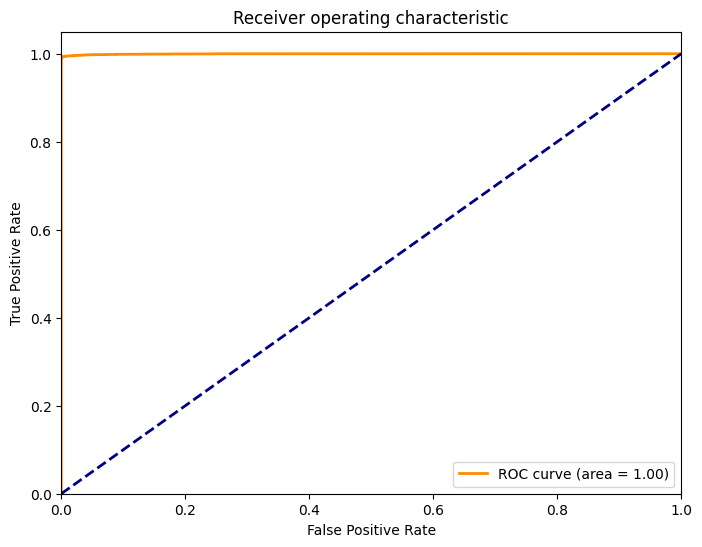

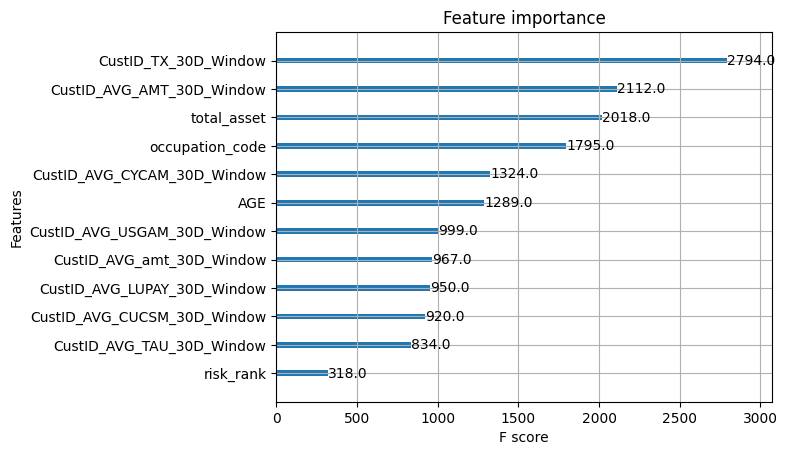

In [97]:
#Create XGBoost Classifier with best parameters
xgbBest = xgb.XGBClassifier(**study.best_params)
xgbBest.fit(X_train, Y_train)
xgbBest_pred = xgbBest.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, xgbBest_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, xgbBest_pred))
plot_roc_curve(Y_test, xgbBest.predict_proba(X_test)[::,1])

#Plot feature importance
xgb.plot_importance(xgbBest)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()



In [98]:
#Check amount of fraud in the model calculated by the model
fraud = xgbBest.predict_proba(test)
fraud = pd.DataFrame(fraud)
fraud = fraud[1]
fraud = fraud[fraud > 0.5]
len(fraud)





93

In [99]:
#Predict fraud probability for test data
xgbBest_pred_test_prob = xgbBest.predict_proba(test)
xgbBest_pred_test_prob = pd.DataFrame(xgbBest_pred_test_prob)
xgbBest_pred_test_prob.head()


,0,1
0,0.998142,0.001858
1,0.999633,0.000367
2,0.998433,0.001567
3,0.999972,0.000028
4,0.999957,0.000043


In [100]:
#Length of xgbBest_pred_test_prob
len(xgbBest_pred_test_prob)

3850

In [101]:
testAlertXGB2 = testAlert
testAlertXGB2['probability'] = xgbBest_pred_test_prob[1]
testAlertXGB2.head()

,alert_key,probability
0,352249.0,0.001858
1,352253.0,0.000367
2,352254.0,0.001567
3,352280.0,0.000028
4,352282.0,0.000043


In [102]:
#Combine my_submission_xgbBest and sample and replace the probability column with my_submission_xgbBest probability column
my_submission_xgbBest_combine = pd.merge(sample, testAlertXGB2, on='alert_key', how='left')
my_submission_xgbBest_combine.head()

,alert_key,probability_x,probability_y
0,352249,0.098923,0.001858
1,352253,0.344260,0.000367
2,352254,0.177932,0.001567
3,352280,0.784828,0.000028
4,352282,0.949316,0.000043


In [103]:
#Replace NaN values with with probailty_x column
my_submission_xgbBest_combine['probability_y'] = my_submission_xgbBest_combine['probability_y'].fillna(my_submission_xgbBest_combine['probability_x'])

#Drop probability_x column
my_submission_xgbBest_combine = my_submission_xgbBest_combine.drop(['probability_x'], axis=1)

#rename probability_y column to probability
my_submission_xgbBest_combine = my_submission_xgbBest_combine.rename(columns={'probability_y': 'probability'})




In [104]:
#Head of my_submission_xgbBest_combine
my_submission_xgbBest_combine.head()

,alert_key,probability
0,352249,0.001858
1,352253,0.000367
2,352254,0.001567
3,352280,0.000028
4,352282,0.000043


In [105]:
#Convert the dataframe to csv
my_submission_xgbBest_combine.to_csv('submission_xgbBestNewDataset.csv', index=False)
